# Initial CSV File Reading

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import numpy as np
import matplotlib.lines as mlines
from scipy.stats import mannwhitneyu
import shutil

#General results RQ

thesis_df = pd.read_csv('CSV/results-thesis4.csv') # This CSV may have the results from default Pynguin
thesis_df['SearchTime'] = thesis_df['SearchTime'].apply(lambda x: int(x/10**9))
thesis_df['TotalTime'] = thesis_df['TotalTime'].apply(lambda x: int(x/10**9))
thesis_df['GBOSGenerationTime'] = thesis_df['GBOSGenerationTime'].apply(lambda x: int(x/10**9))
thesis_df['GBOSDecisionTime'] = thesis_df['GBOSDecisionTime'].apply(lambda x: int(x/10**9))
default_df = thesis_df[thesis_df['ConfigurationId'].str.match('PYNGUIN')]

gbos_mio_df = pd.read_csv('CSV/results-flags-MIO.csv') # This CSV may have the results from the heuristic using MIO
gbos_others_df = pd.read_csv('CSV/results-flags-OTHERS.csv') # This CSV may have the results from the heuristic using the other algorithms
gbos_mio_df['ConfigurationId'] = gbos_mio_df['ConfigurationId'].apply(lambda x: x.split('-')[1])
gbos_others_df['ConfigurationId'] = gbos_others_df['ConfigurationId'].apply(lambda x: x.split('-')[1])
gbos_mio_df.drop(columns='GBOSFlags', inplace=True)
gbos_others_df.drop(columns='GBOSFlags', inplace=True)


default_df['ConfigurationId'] = default_df['ConfigurationId'].apply(lambda x: x.split('-')[1])

gbos_df = pd.concat([gbos_mio_df, gbos_others_df])

gbos_df['SearchTime'] = gbos_df['SearchTime'].apply(lambda x: int(x/10**9))
gbos_df['TotalTime'] = gbos_df['TotalTime'].apply(lambda x: int(x/10**9))
gbos_df['GBOSGenerationTime'] = gbos_df['GBOSGenerationTime'].apply(lambda x: int(x/10**9))
gbos_df['GBOSDecisionTime'] = gbos_df['GBOSDecisionTime'].apply(lambda x: int(x/10**9))


In [2]:
configurationIDs = ['DYNAMOSA', 'MOSA', 'WHOLE_SUITE', 'MIO']
summary_dict = {}
summary_dict['Original Modules'] = {'GBOS': {}, 'Pynguin': {}}


modules_gbos = gbos_df.groupby(['TargetModule', 'ConfigurationId']).size().reset_index()
modules_default = default_df.groupby(['TargetModule', 'ConfigurationId']).size().reset_index()

for conf in configurationIDs:
    summary_dict['Original Modules']['GBOS'][conf] = len(modules_gbos[modules_gbos['ConfigurationId'] == conf])
    summary_dict['Original Modules']['Pynguin'][conf] = len(modules_default[modules_default['ConfigurationId'] == conf])

summary_dict

{'Original Modules': {'GBOS': {'DYNAMOSA': 553,
   'MOSA': 554,
   'WHOLE_SUITE': 555,
   'MIO': 527},
  'Pynguin': {'DYNAMOSA': 557, 'MOSA': 553, 'WHOLE_SUITE': 555, 'MIO': 551}}}

In [3]:
#Dropping all rows that contain a module that doesn't have more than 10 runs

to_leave_gbos = gbos_df.groupby(['TargetModule', 'ConfigurationId']).size()
to_leave_gbos = to_leave_gbos[to_leave_gbos >= 10]
to_leave_gbos = to_leave_gbos[to_leave_gbos <= 30]
gbos_df = gbos_df[gbos_df[["TargetModule","ConfigurationId"]].apply(tuple, 1).isin(list(to_leave_gbos.index))]

to_leave_default = default_df.groupby(['TargetModule', 'ConfigurationId']).size()
to_leave_default = to_leave_default[to_leave_default >= 10]
to_leave_default = to_leave_default[to_leave_default <= 30]
default_df = default_df[default_df[["TargetModule","ConfigurationId"]].apply(tuple, 1).isin(list(to_leave_default.index))]



# Example of Module with 0 Iterations

In [4]:
example = default_df[default_df['AlgorithmIterations'] == 0]

example.head()

,TargetModule,ConfigurationId,RunId,ProjectName,SearchTime,GBOSDecisionTime,GBOSGenerationTime,TotalTime,AlgorithmIterations,Coverage,...,CoverageTimeline_T591,CoverageTimeline_T592,CoverageTimeline_T593,CoverageTimeline_T594,CoverageTimeline_T595,CoverageTimeline_T596,CoverageTimeline_T597,CoverageTimeline_T598,CoverageTimeline_T599,CoverageTimeline_T600
310,workalendar.usa.michigan,MOSA,1760,workalendar,0,0,0,1,0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
318,workalendar.usa.michigan,MOSA,1760,workalendar,0,0,0,1,0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
325,workalendar.usa.michigan,MOSA,1760,workalendar,0,0,0,1,0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
331,workalendar.usa.michigan,MOSA,1760,workalendar,0,0,0,1,0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
335,workalendar.usa.michigan,MOSA,1760,workalendar,0,0,0,1,0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


# Figure 4.1 - OLR Histogram

537 588 91.3265306122449
51 588 8.673469387755102


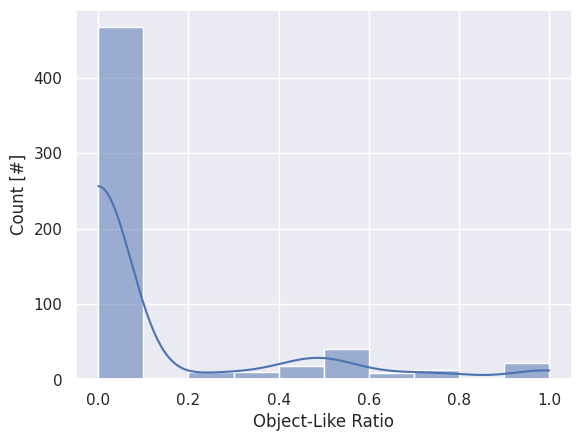

In [5]:
plt.rcParams.update({
    "text.usetex": False
})
import json
ratio_file = open('filtered-ratio.json', 'r')
ratio = dict(json.load(ratio_file))

ratios = ratio.values() #588 modules
ratios_10 = [rat for rat in ratios if rat <= 0.5]
print(len(ratios_10), len(ratios), (len(ratios_10)/len(ratios))*100)
print(len(ratios) - len(ratios_10), len(ratios), ((len(ratios) - len(ratios_10))/len(ratios))*100)

f = plt.figure(1)
sns.set_theme(style="darkgrid")
hist = sns.histplot(ratios, bins=10, kde=True)
hist.set_xlabel('Object-Like Ratio')
hist.set_ylabel('Count [#]')
plt.legend([],[], frameon=False)
f.savefig('Figures/olr-hist.jpg', bbox_inches='tight')
f.savefig('../Document/Figures/Results/olr-hist.jpg', bbox_inches='tight')


# Figures 4.2 to 4.4.1 - Violin Plots

----------------------------------------------------------------------
Metric-Configuration                   PercDiff  MinCovDef  MinCovGBOS
----------------------------------------------------------------------
Coverage-DYNAMOSA                   :   -1.022     0.061      0.059   
Coverage-MOSA                       :   -0.344     0.058      0.060   
Coverage-WHOLE_SUITE                :   -0.233     0.051      0.050   
Coverage-MIO                        :   -3.577     0.052      0.000   
----------------------------------------------------------------------
Metric-Configuration                   PercDiff  MinCovDef  MinCovGBOS
----------------------------------------------------------------------
AlgorithmIterations-DYNAMOSA        :   -4.546     93.567     98.000  
AlgorithmIterations-MOSA            :   -6.800     74.733     74.450  
AlgorithmIterations-WHOLE_SUITE     :   -9.730     74.400     74.850  
AlgorithmIterations-MIO             :   14.101    4887.767    0.000   
------

{'Original Modules': {'GBOS': {'DYNAMOSA': 553,
   'MOSA': 554,
   'WHOLE_SUITE': 555,
   'MIO': 527},
  'Pynguin': {'DYNAMOSA': 557, 'MOSA': 553, 'WHOLE_SUITE': 555, 'MIO': 551}},
 'RQ1 Modules - Before': {'GBOS': {'DYNAMOSA': 529,
   'MOSA': 523,
   'WHOLE_SUITE': 539,
   'MIO': 119},
  'Pynguin': {'DYNAMOSA': 541, 'MOSA': 540, 'WHOLE_SUITE': 544, 'MIO': 538}},
 'RQ1 Modules - After': {'GBOS': {'DYNAMOSA': 109,
   'MOSA': 109,
   'WHOLE_SUITE': 109,
   'MIO': 109},
  'Pynguin': {'DYNAMOSA': 109, 'MOSA': 109, 'WHOLE_SUITE': 109, 'MIO': 109}}}

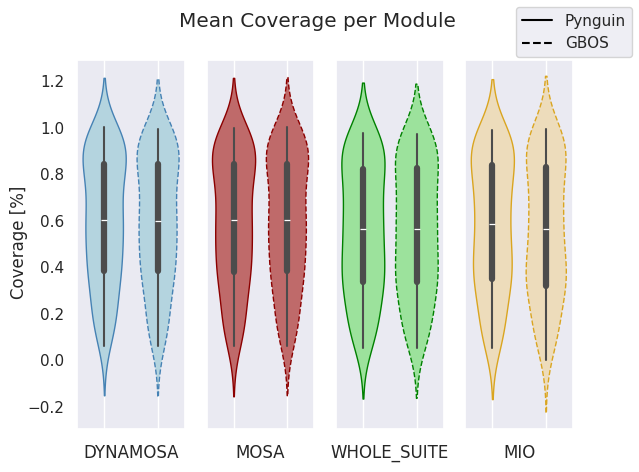

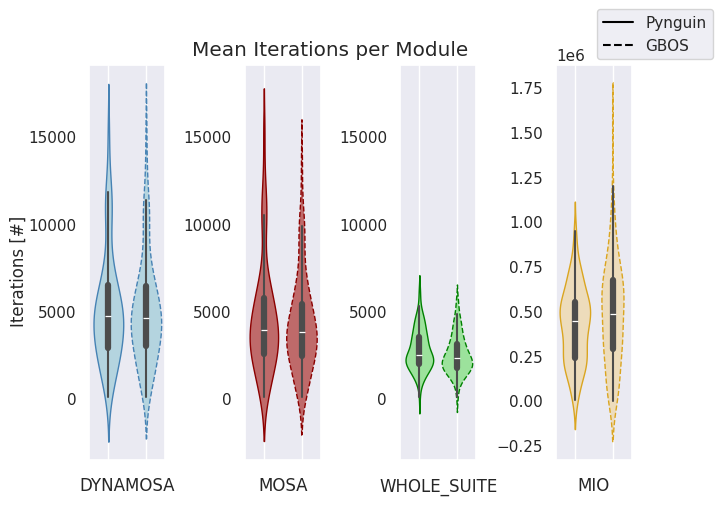

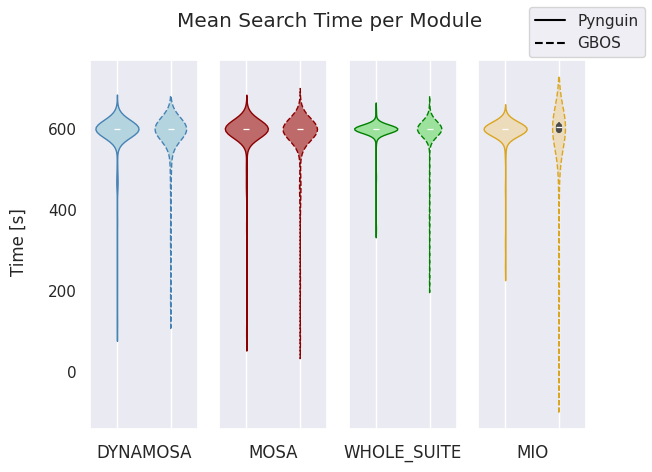

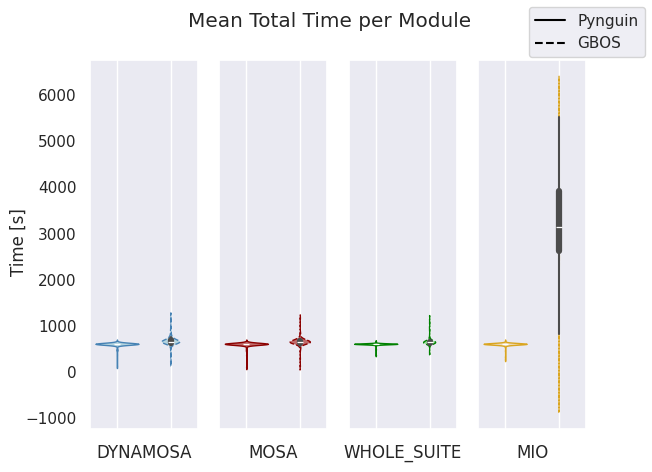

In [6]:
plt.rcParams.update({
    "text.usetex": False
})

import statistics

rq1_search_time_vars = open('Figures/rq1_search_time_vars.tex', 'w')

def get_change(current, previous):
    if current == previous:
        return 0.0
    try:
        return ((current - previous) / previous) * 100.0
    except ZeroDivisionError:
        return 0

keys = ['Coverage', 'AlgorithmIterations', 'SearchTime', 'TotalTime'] # The key for the generated graph [Coverage | AlgorithmIterations | TotalTime]
title = ['Mean Coverage per Module', 'Mean Iterations per Module', 'Mean Search Time per Module', 'Mean Total Time per Module']
ylabel = ['Coverage [%]', 'Iterations [#]', 'Time [s]', 'Time [s]']
ylabel_pos = [0.02, 0, 0, 0]
share_y = [True, False, True, True]
configurationIDs = ['DYNAMOSA', 'MOSA', 'WHOLE_SUITE', 'MIO']
sub_titles = ["DYNAMOSA", "MOSA", "WHOLE_SUITE", "MIO"]
colors = ['lightblue', 'indianred', 'lightgreen', 'wheat']
dark_colors = ['steelblue', 'darkred', 'green', 'goldenrod']

per_alg_dict = dict()

summary_dict['RQ1 Modules - Before'] = {'GBOS': {}, 'Pynguin': {}}
summary_dict['RQ1 Modules - After'] = {'GBOS': {}, 'Pynguin': {}}

module_set = []

for config in configurationIDs:
    default_df_modules = default_df[default_df['ConfigurationId'] == config]
    gbos_df_modules = gbos_df[gbos_df['ConfigurationId'] == config]

    summary_dict['RQ1 Modules - Before']['GBOS'][config] = len(set(gbos_df_modules['TargetModule']))
    summary_dict['RQ1 Modules - Before']['Pynguin'][config] = len(set(default_df_modules['TargetModule']))
    
    module_set_default = set(default_df_modules['TargetModule'])
    module_set_gbos = set(gbos_df_modules['TargetModule'])
    intersection_set = module_set_default.intersection(module_set_gbos)
    module_set.append(intersection_set)

intersection_set = set.intersection(*module_set) 

for config in configurationIDs:
    
    default_df_modules = default_df[default_df['ConfigurationId'] == config]
    default_df_modules = default_df_modules[['TargetModule', 'SearchTime', 'TotalTime', 'AlgorithmIterations','Coverage']]
    default_df_modules = default_df_modules[default_df_modules['TargetModule'].isin(intersection_set)].groupby('TargetModule').mean()

    gbos_df_modules = gbos_df[gbos_df['ConfigurationId'] == config]
    gbos_df_modules = gbos_df_modules[['TargetModule', 'SearchTime', 'TotalTime', 'AlgorithmIterations','Coverage']]
    gbos_df_modules = gbos_df_modules[gbos_df_modules['TargetModule'].isin(intersection_set)].groupby('TargetModule').mean()


    summary_dict['RQ1 Modules - After']['GBOS'][config] = len(gbos_df_modules)
    summary_dict['RQ1 Modules - After']['Pynguin'][config] = len(default_df_modules)

    per_alg_dict[config] = {key:[list(default_df_modules[key]), list(gbos_df_modules[key])] for key in keys}

for idx, key in enumerate(keys):
    sns.set_theme(style="darkgrid")
    f, axs = plt.subplots(1, len(configurationIDs), sharey=share_y[idx])
    previous = None
    f.text(ylabel_pos[idx], 0.5, ylabel[idx], va='center', rotation='vertical')
    dashed_line = mlines.Line2D([], [], color='black',
                          markersize=15, label='Pynguin')
    solid_line = mlines.Line2D([], [], color='black', linestyle='--',
                          markersize=15, label='GBOS')
    print('-'*70)
    print("Metric-Configuration".ljust(37, ' '),"PercDiff".center(10, ' '), "MinCovDef".center(10, ' '), "MinCovGBOS".center(10, ' '))
    print('-'*70)
    for idx2, config in enumerate(configurationIDs):
        default, gbos = per_alg_dict[config][key][0], per_alg_dict[config][key][1]
        if config == 'MIO':
            previous=None
        if key == "SearchTime":
            rq1_search_time_vars.write("\\newcommand\\{0}{{{1:.2f}}}\n".format(key + config.replace("_", ""), get_change(statistics.mean(gbos), statistics.mean(default))))
        print((key + "-" + config).ljust(35, ' '), ":", "{0:.3f}".format(get_change(statistics.mean(gbos), statistics.mean(default))).center(10, ' '), "{0:.3f}".format(min(default)).center(10, ' '), "{0:.3f}".format(min(gbos)).center(10, ' '))
        sub_ax = sns.violinplot(data={"Pynguin": default, "GBOS": gbos},
                             color=colors[idx2], legend=False,
                            ax=axs[idx2], linewidth=1)
        if previous != None:
            sub_ax.sharey(previous)
        if not share_y[idx]:
            previous = sub_ax
        sub_ax.collections[0].set_edgecolor(dark_colors[idx2])
        sub_ax.collections[1].set_edgecolor(dark_colors[idx2])
        sub_ax.collections[1].set_linestyle('--')
        sub_ax.set_title(sub_titles[idx2], y=-0.1)
        sub_ax.set_xticklabels([])
        sub_ax.grid(axis='both')
    if not share_y[idx]:
        f.tight_layout()
        f.legend(handles=[dashed_line, solid_line], bbox_to_anchor=(1.11, 1.06))
    else:
        f.legend(handles=[dashed_line, solid_line])
    f.suptitle(title[idx])
    f.savefig('Figures/' + key + '.jpg', bbox_inches='tight')
    f.savefig('../Document/Figures/Results/' + key + '.jpg', bbox_inches='tight')

rq1_search_time_vars.close()
shutil.copyfile('Figures/rq1_search_time_vars.tex', '../Document/Figures/Results/rq1_search_time_vars.tex')

summary_dict


# Figure 4.4.2 - GBOS Times Barplots

--------------------------------------------------
                     Decision difference Generation difference
--------------------------------------------------
DYNAMOSA                 -91.574         -96.150    
MOSA                     -93.547         -96.958    
WHOLE_SUITE              -94.682         -96.333    
MIO                      255.692          31.587    
--------------------------------------------------


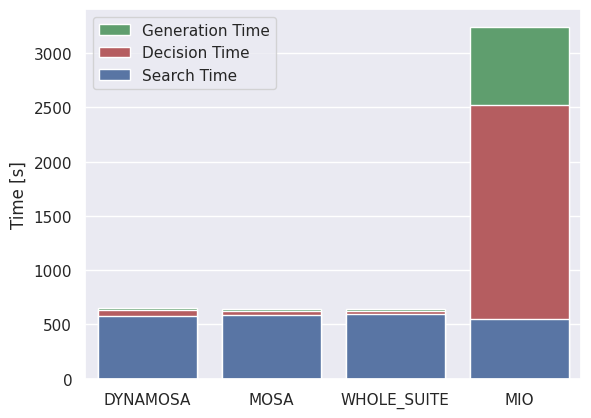

In [7]:
plt.rcParams.update({
    "text.usetex": False
})

rq1_bar_plot_vars = open('Figures/rq1_bar_plot_vars.tex', 'w')

gbos_times = gbos_df[['TargetModule', 'ConfigurationId', 'SearchTime', 'TotalTime', 'GBOSGenerationTime', 'GBOSDecisionTime']]

configurationIDs = ['DYNAMOSA', 'MOSA', 'WHOLE_SUITE', 'MIO']
ticks = ['DYNAMOSA', 'MOSA', 'WHOLE_SUITE', 'MIO']

search_time = []
decision = []
generation = []

for conf in configurationIDs:
    gbos_times_modules = gbos_times[gbos_times['ConfigurationId'] == conf]
    gbos_times_modules = gbos_times_modules[gbos_times_modules['TargetModule'].isin(intersection_set)]
    gbos_times_grouped = gbos_times_modules.drop(columns='ConfigurationId').groupby('TargetModule').mean()
    search_time.append(gbos_times_grouped['SearchTime'].mean())
    decision.append(gbos_times_grouped['GBOSDecisionTime'].mean())
    generation.append(gbos_times_grouped['GBOSGenerationTime'].mean())

print('-'*50)
print(' '*20, "Decision difference".center(15, ' '), "Generation difference".center(15, ' '))
print('-'*50)


range_d = []
range_g = []

for idx, conf in enumerate(configurationIDs):
    if conf == "MIO":
        rq1_bar_plot_vars.write("\\newcommand\\DiffDecMIO{{{0:.2f}}}\n".format(get_change(decision[idx], search_time[idx])))
        rq1_bar_plot_vars.write("\\newcommand\\DiffGenMIO{{{0:.2f}}}\n".format(get_change(generation[idx], search_time[idx])))
    else:
        range_d.append(get_change(decision[idx], search_time[idx]))
        range_g.append(get_change(generation[idx], search_time[idx]))
    print("{0}".format(conf).ljust(20, ' '),"{0:.3f}".format(get_change(decision[idx], search_time[idx])).center(15, ' '),"{0:.3f}".format(get_change(generation[idx], search_time[idx])).center(15, ' '))
print('-'*50)

rq1_bar_plot_vars.write("\\newcommand\\DiffDecMin{{{0:.2f}}}\n".format(min(range_d)))
rq1_bar_plot_vars.write("\\newcommand\\DiffDecMax{{{0:.2f}}}\n".format(max(range_d)))
rq1_bar_plot_vars.write("\\newcommand\\DiffGenMin{{{0:.2f}}}\n".format(min(range_g)))
rq1_bar_plot_vars.write("\\newcommand\\DiffGenMax{{{0:.2f}}}\n".format(max(range_g)))

for i in range(4):
    decision[i] += search_time[i]
    generation[i] += decision[i]

plt.subplots()

sns.barplot(generation, color='g', label='Generation Time')
sns.barplot(decision, color='r', label='Decision Time')
last = sns.barplot(search_time, color='b', label='Search Time')

plt.legend()
last.set_xticks([0,1,2,3], labels=ticks)
last.set_ylabel('Time [s]')

rq1_bar_plot_vars.close()
shutil.copyfile('Figures/rq1_bar_plot_vars.tex', '../Document/Figures/Results/rq1_bar_plot_vars.tex')

plt.savefig('Figures/timeDist.jpg')
plt.savefig('../Document/Figures/Results/timeDist.jpg')


# Table 4.1 - Cohen's D Effect Size Over Time Steps

In [8]:
import statistics
import decimal
import warnings
warnings.filterwarnings('ignore')

np.seterr(all="ignore")

def mean_of_mean(serie: pd.Series) -> float:
    mean_list = list()
    for elem in serie:
        if elem:
            mean_list.append(statistics.mean(elem))
    if mean_list:
        return statistics.mean(mean_list)
    else:
        return 0.0


def cohend(d1: list[float], d2: list[float]):
    # calculate the size of samples
    if not d1 or not d2:
        return 0.0
    n1, n2 = len(d1), len(d2)
    # calculate the variance of the samples
    s1, s2 = np.var(d1, ddof=1), np.var(d2, ddof=1)
    # calculate the pooled standard deviation
    s = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
    # calculate the means of the samples
    u1, u2 = np.mean(d1), np.mean(d2)
    if s == 0.0:
        return 0.0
    # calculate the effect size
    return (u1 - u2) / s

def numeric(s):
    if abs(s) < 10:
        return '\\(' + str(s) + '\\)'
    else:
        d = decimal.Decimal(s)
        return '\\(' + format(d, '.2e') + '\\)'



timeline_steps = [300, 450, 600]
configurationIDs = ['DYNAMOSA', 'MOSA', 'WHOLE_SUITE', 'MIO']

results_dict = dict()

best_mod_list = []
best_es_list = []
worst_mod_list = []
worst_es_list = []

for time_step in timeline_steps:
    results_dict[time_step] = dict()
        
    for config in configurationIDs:
        results_dict[time_step][config] = dict()
        default_df_modules = default_df[default_df['ConfigurationId'] == config]
        default_df_modules = default_df_modules[['TargetModule', 'CoverageTimeline_T' + str(time_step)]]
        
        gbos_df_modules = gbos_df[gbos_df['ConfigurationId'] == config]
        gbos_df_modules = gbos_df_modules[['TargetModule', 'CoverageTimeline_T' + str(time_step)]]

        default_s = default_df_modules[default_df_modules['TargetModule'].isin(intersection_set)].groupby('TargetModule')['CoverageTimeline_T' + str(time_step)].apply(list).rename('DefaultCov')
        gbos_s = gbos_df_modules[gbos_df_modules['TargetModule'].isin(intersection_set)].groupby('TargetModule')['CoverageTimeline_T' + str(time_step)].apply(list).rename('GBOSCov')
        merged_df = pd.concat([default_s, gbos_s], axis=1).reset_index()
        merged_df['Cohen-Default-GBOS'] = merged_df.apply(lambda x: cohend(x.GBOSCov, x.DefaultCov), axis=1)
        merged_df['MWU-Default-GBOS'] = merged_df.apply(lambda x: mannwhitneyu(x.GBOSCov, x.DefaultCov, method='exact')[1], axis=1)
        results_dict[time_step][config]['Effect_Size'] = merged_df['Cohen-Default-GBOS'].mean()
        results_dict[time_step][config]['p-value-MWU'] = merged_df['MWU-Default-GBOS'].mean()
        results_dict[time_step][config]['GBOS-Cov'] = mean_of_mean(merged_df['GBOSCov'])
        results_dict[time_step][config]['Default-Cov'] = mean_of_mean(merged_df['DefaultCov'])

        if time_step == 600:
            worst_es = merged_df['Cohen-Default-GBOS'].min()
            best_es = merged_df['Cohen-Default-GBOS'].max()
            worst_row = merged_df[merged_df['Cohen-Default-GBOS'] == worst_es]
            best_row = merged_df[merged_df['Cohen-Default-GBOS'] == best_es]
            print("-"*60)
            print("{0} worst module '{1}' with value {2:.3f}".format(config, worst_row['TargetModule'].values[0], worst_es))
            print("{0} best module '{1}' with value {2:.3f}".format(config, best_row['TargetModule'].values[0], best_es))
            worst_mod_list.append(worst_row['TargetModule'].values[0])
            best_mod_list.append(best_row['TargetModule'].values[0])
            worst_es_list.append(worst_es)
            best_es_list.append(best_es)
print("-"*60)
for time_step in timeline_steps:
    table = open('Figures/' + str(time_step) + '-table.tex', 'w')
    table.write('\\begin{tabular}{l' + ('c' * len(configurationIDs))  + '}')
    table.write('\\toprule \n')
    table.write('\multirow{2}{*}{Coverage Performance} & \multicolumn{' + str(len(configurationIDs)) + '}{c}{Budget - ' + str(time_step) + '[s] } \\\\ \\cmidrule(lr){2-' + str(1 + len(configurationIDs)) + '}  \n')
    table.write('                                      & ' + '&'.join(configurationIDs).replace('_', '') + '                         \\\\ \midrule \n')
    table.write('GBOS                                  & ' + '&'.join([numeric(round(results_dict[time_step][config]['GBOS-Cov'], 2)) for config in configurationIDs])  + '                       \\\\ \n')
    table.write('Pynguin                               & ' + '&'.join([numeric(round(results_dict[time_step][config]['Default-Cov'], 2)) for config in configurationIDs])  + '                       \\\\ \n')
    table.write('p Value                               & ' + '&'.join([numeric(round(results_dict[time_step][config]['p-value-MWU'], 2)) for config in configurationIDs])  + '                     \\\\ \n')
    table.write("Cohen's D Effect Size                 & " + '&'.join([numeric(round(results_dict[time_step][config]['Effect_Size'], 2)) for config in configurationIDs]) +"                       \\\\ \n")
    table.write('\\bottomrule \n')
    table.write('\\end{tabular}')
    table.close()
    shutil.copyfile('Figures/' + str(time_step) + '-table.tex', '../Document/Figures/Results/' + str(time_step) + '-table.tex')

average_cohen = open('Figures/average_cohen.tex', 'w')
average_cohen.write("\\newcommand\\AverageCohen{{{0:.2f}}}\n".format(statistics.mean([results_dict[600][config]['Effect_Size'] for config in configurationIDs])))
average_cohen.close()
shutil.copyfile('Figures/average_cohen.tex', '../Document/Figures/Results/average_cohen.tex')


------------------------------------------------------------
DYNAMOSA worst module 'isort.parse' with value -4.969
DYNAMOSA best module 'pytutils.trees' with value 1.960
------------------------------------------------------------
MOSA worst module 'sanic.models.protocol_types' with value -1.959
MOSA best module 'pytutils.trees' with value 1.960
------------------------------------------------------------
WHOLE_SUITE worst module 'sanic.models.protocol_types' with value -1.960
WHOLE_SUITE best module 'pytutils.trees' with value 1.960
------------------------------------------------------------
MIO worst module 'setuptools._distutils.archive_util' with value -22.986
MIO best module 'pymonet.monad_try' with value 1.949
------------------------------------------------------------


'../Document/Figures/Results/average_cohen.tex'

# Figures 4.5 and 4.6 - Further Analysis Of Best Effect Size Values in Previous Graph

Range of difference in amount of runs between:
    * Best effect sizes modules : (10,20)


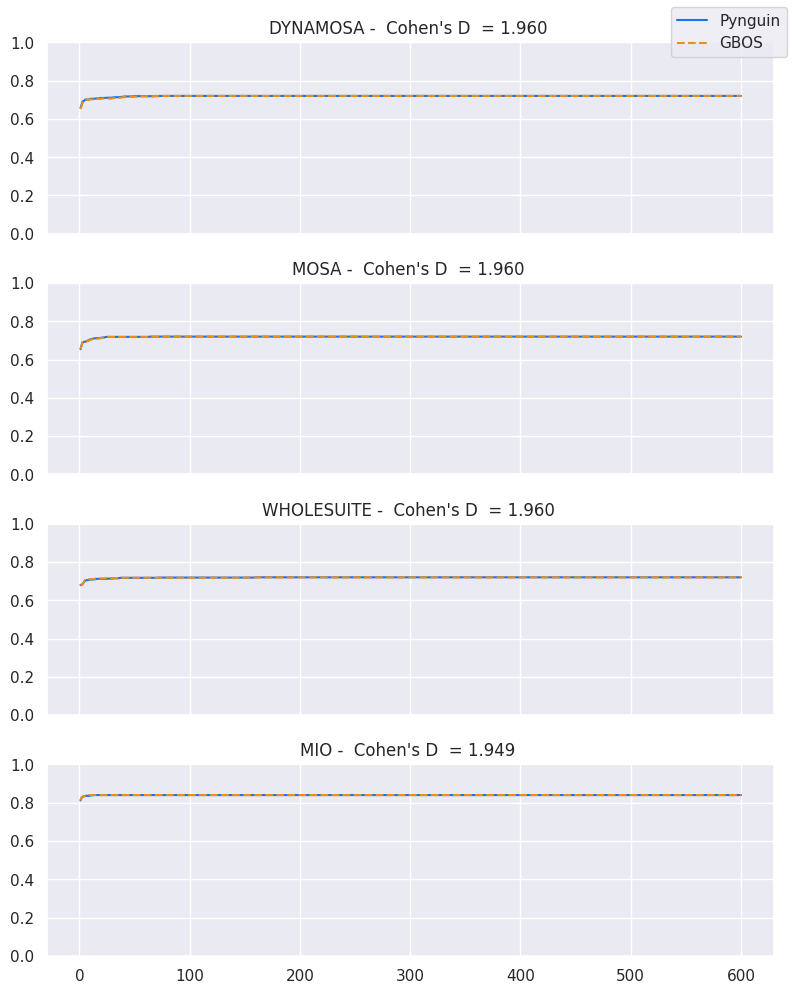

In [10]:
plt.rcParams.update({
    "text.usetex": False
})

configurationIDs = ['DYNAMOSA', 'MOSA', 'WHOLE_SUITE', 'MIO']
configurationTitles = ['DYNAMOSA', 'MOSA', 'WHOLESUITE', 'MIO']

to_drop = ['RandomSeed', 'ImportBranchCoverage', 'GBOSDecisionTime', 'TargetModule', 'ConfigurationId', 'RunId', 'ProjectName', 'SearchTime', 'GBOSGenerationTime', 'TotalTime', 'AlgorithmIterations', 'Coverage']

f2, axs_best = plt.subplots(nrows=4, ncols=1, sharex='col', figsize=(8, 10))

six_hund = [x for x in range(1, 601)]

run_diff_worst = []
run_diff_best = []

for idx, config in enumerate(configurationIDs):
    default_config = default_df[default_df['ConfigurationId'] == config]
    gbos_config = gbos_df[gbos_df['ConfigurationId'] == config]

    #BEST
    default_best = default_config[default_config['TargetModule'] == best_mod_list[idx]]
    default_best.drop(to_drop, axis=1, inplace=True)
    gbos_best = gbos_config[gbos_config['TargetModule'] == best_mod_list[idx]]
    gbos_best.drop(to_drop, axis=1, inplace=True)

    best_default_series = list(default_best.mean())
    best_gbos_series = list(gbos_best.mean())

    if idx == 3:
        axs_best[idx].plot(six_hund,best_default_series,label='Pynguin', color='#1a73e9', linestyle='solid')
        axs_best[idx].plot(six_hund,best_gbos_series,label='GBOS', color='#e9901a',  linestyle='dashed')
    else:
        axs_best[idx].plot(six_hund,best_default_series, color='#1a73e9', linestyle='solid')
        axs_best[idx].plot(six_hund,best_gbos_series, color='#e9901a',  linestyle='dashed')
    axs_best[idx].set_title(configurationTitles[idx] + " -  Cohen's D  = " + "{0:.3f} ".format(best_es_list[idx]))
    axs_best[idx].set_ylim((0.0, 1.0))
    run_diff_best.append( default_best.shape[0]-gbos_best.shape[0])

print("Range of difference in amount of runs between:")
print(f"    * Best effect sizes modules : ({min(run_diff_best)},{max(run_diff_best)})")

f2.legend()
f2.tight_layout()

f2.savefig(('Figures/bestES.jpg'))
f2.savefig(('../Document/Figures/Results/bestES.jpg'))


In [11]:
summary_dict

{'Original Modules': {'GBOS': {'DYNAMOSA': 553,
   'MOSA': 554,
   'WHOLE_SUITE': 555,
   'MIO': 527},
  'Pynguin': {'DYNAMOSA': 557, 'MOSA': 553, 'WHOLE_SUITE': 555, 'MIO': 551}},
 'RQ1 Modules - Before': {'GBOS': {'DYNAMOSA': 529,
   'MOSA': 523,
   'WHOLE_SUITE': 539,
   'MIO': 119},
  'Pynguin': {'DYNAMOSA': 541, 'MOSA': 540, 'WHOLE_SUITE': 544, 'MIO': 538}},
 'RQ1 Modules - After': {'GBOS': {'DYNAMOSA': 109,
   'MOSA': 109,
   'WHOLE_SUITE': 109,
   'MIO': 109},
  'Pynguin': {'DYNAMOSA': 109, 'MOSA': 109, 'WHOLE_SUITE': 109, 'MIO': 109}}}

# Figures 4.7 - Scatter Plot of Olr and A12 Effect Size

--------------------------DYNAMOSA--------------------------
Ratio of survival:                             43/529 = 8.129
Pearsons correlation:                                   0.120
Spearmans correlation:                                  0.097
Best effect size of 0.591 found in module py_backwards.compiler
29
20
Worst effect size of 0.000 found in module pkg_resources._vendor.importlib_resources._legacy
----------------------------MOSA----------------------------
Ratio of survival:                             42/523 = 8.031
Pearsons correlation:                                   0.211
Spearmans correlation:                                  0.114
Best effect size of 0.584 found in module pkg_resources._vendor.packaging._parser
29
20
Worst effect size of 0.000 found in module pkg_resources._vendor.importlib_resources._legacy
------------------------WHOLE_SUITE-------------------------
Ratio of survival:                             46/539 = 8.534
Pearsons correlation:                  

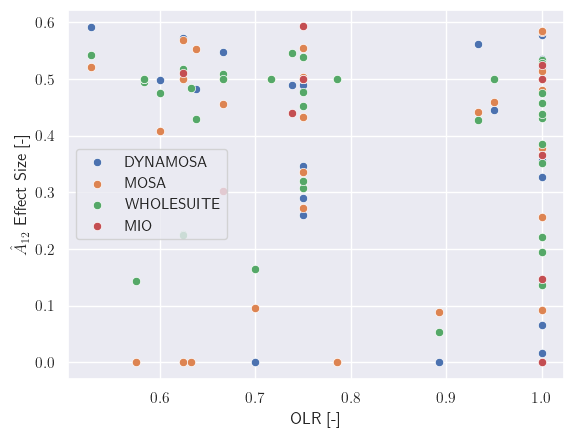

In [12]:
plt.rcParams.update({
    "text.usetex": True
})

import json
import statistics
from bisect import bisect_left
from scipy import stats
from scipy.stats import pearsonr, spearmanr

#RQ2

def vd_a(
    treatment: list[float],
    control: list[float],
    levels: tuple[float, float, float] | None = None,
) -> tuple[float, str]:
    """Computes the Vargha and Delaney effect size statistics.

    The Vargha and Delaney effect size statistics Â_{12} computes the size of an effect
    between two data sets.  Our implementation applies an optimisation to minimise the
    accuracy errors due to the representation of ``float`` values, cf. the respective
    `blog post`_ by Marco Torchiano.  This implementation is based on a `GitHub Gist`_
    by Jackson Pradolima, who transfered Torchiano's R code to Python.

    The implementation returns not only the effect-size value but also a string
    representation of this effect size.  The level borders of the different effect sizes
    (negligible, small, medium, or large) are taken from the work of Hess and Kromrey.

    The length of both parameter lists has to be equivalent.

    * A. Vargha and H.D. Delaney. *A critique and improvement of the CL common language
      effect size statistics of McGraw and Wong.* Journal of Education and Behavioural
      Statistics, 25(2):101--132, 2000.
    * M.R. Hess and J.D. Kromrey. *Robust Confidence Intervals for Effect Sizes: A
      Comparative Study of Cohen's d and Cliff's Delta Under Non-normality and
      Heterogeneous Variances.* Annual meeting of the American Educational Research
      Association (Vol. 1). Citeseer, 2004.

    .. _blog post: https://mtorchiano.wordpress.com/2014/05/19/effect-size-of-r-precision/
    .. _GitHub Gist: https://gist.github.com/jacksonpradolima/f9b19d65b7f16603c837024d5f8c8a65

    Args:
        treatment: a list of numbers
        control: a list of numbers
        levels: the levels to destinguish between negligible, small, medium, or large
                effect sizes; default are the ones from Hess and Kromrey, 2004.

    Returns:
        A pair of the effect size values and its magnitude as string

    Raises:
        ValueError: If the length of the parameter lists is not equivalent
    """

    def vd_a_string(
        value: float,
        levels: tuple[float, float, float] | None = None,
    ) -> str:
        # Use the effect-size levels from Hess and Kromrey, 2004 as a default
        levels = (0.147, 0.33, 0.474) if levels is None else levels
        magnitude = ["negligible", "small", "medium", "large"]
        scaled_value = (value - 0.5) * 2
        return magnitude[bisect_left(levels, abs(scaled_value))]

    if len(treatment) == 0 and len(control) == 0:
        return 0.5, "negligible"
    if len(treatment) == 0:
        # The motivation here is that we have no data for `treatment` but we do for
        # `control`; maybe the process generating `treatment` always failed.
        return 0.0, "large"
    if len(control) == 0:
        return 1.0, "large"

    m = len(treatment)
    n = len(control)
    r = stats.rankdata(treatment + control)
    r1 = sum(r[0:m])

    # Compute the measure A = (r1 / m - (m+1)/2)/n (formula 14 in Vargha and Delaney,
    # 2000).  We use an equivalent formula to avoid accuracy errors, see Torchiano's
    # blog post linked in the DocString for a discussion.
    effect_size = (2 * r1 - m * (m + 1)) / (2 * n * m)

    return effect_size, vd_a_string(effect_size, levels=levels)

ratio_file = open('filtered-ratio.json', 'r')
ratio = dict(json.load(ratio_file))

pearsons_values = []
spearmans_values = []

average_effect_sizes = []

best_mod_list = []
best_es_list = []
worst_mod_list = []
worst_es_list = []

configurationIDs = ['DYNAMOSA', 'MOSA', 'WHOLE_SUITE', 'MIO']
label = ["DYNAMOSA", "MOSA", "WHOLESUITE", "MIO"]
colors = ['lightblue', 'indianred', 'lightgreen', 'wheat']
dark_colors = ['steelblue', 'darkred', 'green', 'goldenrod']

summary_dict['RQ2 Modules - Before'] = {'GBOS': {}, 'Pynguin': {}}
summary_dict['RQ2 Modules - After'] = {'GBOS': {}, 'Pynguin': {}}

plt.subplots()

for idx, config in enumerate(configurationIDs):

    best_tuple = (-np.inf, None)
    worst_tuple = (np.inf, None)

    pre_coverage_default = default_df[default_df['Coverage'] != default_df['ImportBranchCoverage']]
    pre_coverage_default = pre_coverage_default[pre_coverage_default['ConfigurationId'] == config]

    pre_coverage_gbos = gbos_df[gbos_df['Coverage'] != gbos_df['ImportBranchCoverage']]
    pre_coverage_gbos = pre_coverage_gbos[pre_coverage_gbos['ConfigurationId'] == config]

    summary_dict['RQ2 Modules - Before']['GBOS'][config] = len(set(pre_coverage_gbos['TargetModule']))
    summary_dict['RQ2 Modules - Before']['Pynguin'][config] = len(set(pre_coverage_default['TargetModule']))

    module_set_default = set(pre_coverage_default['TargetModule'])
    module_set_gbos = set(pre_coverage_gbos['TargetModule'])
    intersection_set = module_set_default.intersection(module_set_gbos)

    default_s = pre_coverage_default[pre_coverage_default['TargetModule'].isin(intersection_set)].groupby('TargetModule')['Coverage'].apply(list).rename('DefaultCov')
    gbos_s = pre_coverage_gbos[pre_coverage_gbos['TargetModule'].isin(intersection_set)].groupby('TargetModule')['Coverage'].apply(list).rename('GBOSCov')
    merged_df = pd.concat([default_s, gbos_s], axis=1)

    merged_df['A12'] = merged_df.apply(lambda x: vd_a(x.GBOSCov, x.DefaultCov)[0], axis=1)

    a12_list = []
    ratio_list = []

    for key in set(merged_df.index):
        if ratio[key] > 0.5:
            a12_value = float(merged_df['A12'].loc[key])
            a12_list.append(a12_value)
            ratio_list.append(ratio[key])
            
            if a12_value > best_tuple[0]:
                best_tuple = (a12_value, key)
            if a12_value < worst_tuple[0]:
                worst_tuple = (a12_value, key)

    average_effect_sizes.append(statistics.mean(a12_list))
    total_modules_gbos = len(set(gbos_df[gbos_df['ConfigurationId'] == config]['TargetModule']))
    modules_after_filtering = len(ratio_list)
    survival = (modules_after_filtering/total_modules_gbos)*100

    summary_dict['RQ2 Modules - After']['GBOS'][config] = modules_after_filtering
    summary_dict['RQ2 Modules - After']['Pynguin'][config] = modules_after_filtering

    print(config.center(60, '-'))
    print("Ratio of survival: ".ljust(30, ' '), (str(modules_after_filtering) + "/" + str(total_modules_gbos) + " = {0:.3f}".format(survival)).rjust(30, ' '))

    corr1, _ = pearsonr(a12_list, ratio_list)
    print('Pearsons correlation:'.ljust(30, ' '),'{0:.3f}'.format(corr1).rjust(30, ' '))
    pearsons_values.append(abs(corr1))
    corr2, _ = spearmanr(a12_list, ratio_list)
    print('Spearmans correlation:'.ljust(30, ' '),'{0:.3f}'.format(corr2).rjust(30, ' '))
    spearmans_values.append(abs(corr2))

    print("Best effect size of {0:.3f} found in module {1}".format(best_tuple[0], best_tuple[1]).ljust(60, ' '))
    print(len(pre_coverage_default[pre_coverage_default['TargetModule'] == best_tuple[1]]['Coverage'].values))
    print(len(pre_coverage_gbos[pre_coverage_gbos['TargetModule'] == best_tuple[1]]['Coverage'].values))
    print("Worst effect size of {0:.3f} found in module {1}".format(worst_tuple[0], worst_tuple[1]).ljust(60, ' '))
    worst_mod_list.append(worst_tuple[1])
    best_mod_list.append(best_tuple[1])
    worst_es_list.append(worst_tuple[0])
    best_es_list.append(best_tuple[0])


    scatterplot = sns.scatterplot(y=a12_list, x=ratio_list, label=label[idx])

plt.legend()

mean_a12 = statistics.mean(average_effect_sizes)

print("-"*60)
print("Overal mean A12: ", mean_a12)
print("Pearsons Range : [{0}, {1}]".format(min(pearsons_values),max(pearsons_values)))
print("Spearmans Range : [{0}, {1}]".format(min(spearmans_values), max(spearmans_values)))

rq2_values = open('Figures/rq2_values.tex', 'w')
rq2_values.write("\\newcommand\\AverageA{{{0:.2f}}}\n".format(mean_a12))
rq2_values.write("\\newcommand\\MinMod{{{0}}}\n".format(min(summary_dict['RQ2 Modules - After']['GBOS'].values())))
rq2_values.write("\\newcommand\\MaxMod{{{0}}}\n".format(max(summary_dict['RQ2 Modules - After']['GBOS'].values())))
rq2_values.write("\\newcommand\\MinPearson{{{0:.2f}}}\n".format(min(pearsons_values)))
rq2_values.write("\\newcommand\\MaxPearson{{{0:.2f}}}\n".format(max(pearsons_values)))
rq2_values.write("\\newcommand\\MinSpearmans{{{0:.2f}}}\n".format(min(spearmans_values)))
rq2_values.write("\\newcommand\\MaxSpearmans{{{0:.2f}}}\n".format(max(spearmans_values)))
rq2_values.close()
shutil.copyfile('Figures/rq2_values.tex', '../Document/Figures/Results/rq2_values.tex')

scatterplot.set_ylabel('\\( \\hat{A}_{12} \\) Effect Size [-]')
scatterplot.set_xlabel('OLR [-]')
plt.savefig('Figures/scatterplot.jpg', bbox_inches='tight')
plt.savefig('../Document/Figures/Results/scatterplot.jpg', bbox_inches='tight')

#average = open('Figures/average-a12.tex', 'w')
#average.write("")
#average.close()
#shutil.copyfile('Figures/average-a12.tex', '../Document/Figures/Results/average-a12.tex')


# Figures 4.8 and 4.9 - Further Analysis Of Best Effect Size Values in Previous Graph

Range of difference in amount of runs between:
    * Best effect sizes modules : (9,16)


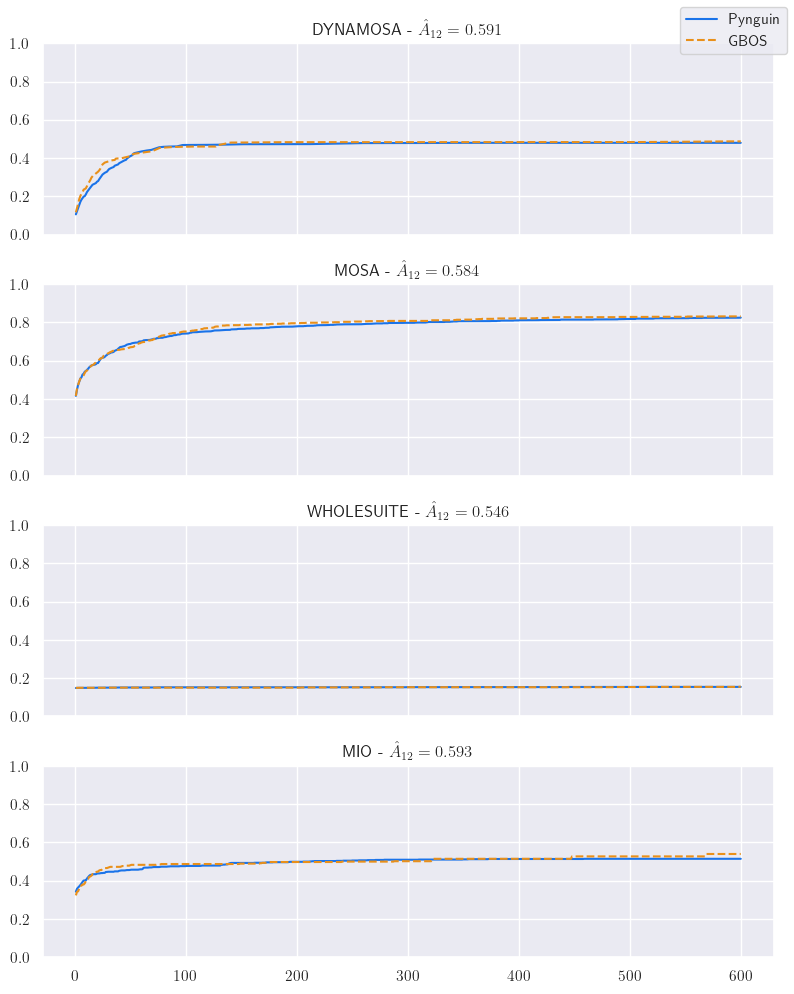

In [14]:
plt.rcParams.update({
    "text.usetex": True
})
configurationIDs = ['DYNAMOSA', 'MOSA', 'WHOLE_SUITE', 'MIO']
configurationTitles = ['DYNAMOSA', 'MOSA', 'WHOLESUITE', 'MIO']

to_drop = ['RandomSeed', 'ImportBranchCoverage', 'GBOSDecisionTime', 'TargetModule', 'ConfigurationId', 'RunId', 'ProjectName', 'SearchTime', 'GBOSGenerationTime', 'TotalTime', 'AlgorithmIterations', 'Coverage']

f2, axs_best = plt.subplots(nrows=4, ncols=1, sharex='col', figsize=(8, 10))

six_hund = [x for x in range(1, 601)]

run_diff_worst = []
run_diff_best = []

for idx, config in enumerate(configurationIDs):
    default_config = default_df[default_df['ConfigurationId'] == config]
    gbos_config = gbos_df[gbos_df['ConfigurationId'] == config]

    #BEST
    default_best = default_config[default_config['TargetModule'] == best_mod_list[idx]]
    gbos_best = gbos_config[gbos_config['TargetModule'] == best_mod_list[idx]]

    gbos_best.drop(to_drop, axis=1, inplace=True)
    default_best.drop(to_drop, axis=1, inplace=True)

    best_default_series = list(default_best.mean())
    best_gbos_series = list(gbos_best.mean())



    if idx == 3:
        axs_best[idx].plot(six_hund,best_default_series,label='Pynguin', color='#1a73e9', linestyle='solid')
        axs_best[idx].plot(six_hund,best_gbos_series,label='GBOS', color='#e9901a',  linestyle='dashed')
    else:
        axs_best[idx].plot(six_hund,best_default_series, color='#1a73e9', linestyle='solid')
        axs_best[idx].plot(six_hund,best_gbos_series, color='#e9901a',  linestyle='dashed')
    axs_best[idx].set_title(configurationTitles[idx] + " - \\( \\hat{A}_{12} = " + "{0:.3f} \\)".format(best_es_list[idx]))
    axs_best[idx].set_ylim((0.0, 1.0))
    run_diff_best.append( default_best.shape[0]-gbos_best.shape[0])

print("Range of difference in amount of runs between:")
print(f"    * Best effect sizes modules : ({min(run_diff_best)},{max(run_diff_best)})")

f2.legend()
f2.tight_layout()

f2.savefig(('Figures/bestA12.jpg'))
f2.savefig(('../Document/Figures/Results/bestA12.jpg'))

#f1.show()
#f2.show()


# Further Analysis of the GBOS Extension

In [15]:
print(summary_dict)

#First Table

first_template = '''
\\begin{{tabular}}{{lcccc}}\\toprule
    \\multicolumn{{1}}{{c}}{{\\multirow{{2}}{{*}}{{Module Set}}}} & \\multicolumn{{4}}{{c}}{{Pynguin}}                \\\\ \\cmidrule(lr){{2-5}}
    \\multicolumn{{1}}{{c}}{{}}                          & DynaMOSA & MOSA    & WHOLE SUITE & MIO     \\\\ \\midrule
    Initial Set                                     & \\({0}\\)  & \\({1}\\) & \\({2}\\)     & \\({3}\\) \\\\
    RQ1 Before Intersection                         & \\({4}\\)  & \\({5}\\) & \\({6}\\)     & \\({7}\\) \\\\
    RQ1 After Intersection                          & \\({8}\\)  & \\({9}\\) & \\({10}\\)     & \\({11}\\) \\\\ 
    \\bottomrule
  \\end{{tabular}}
  \\centering 
  \\begin{{tabular}}{{lcccc}}\\toprule
    \\multicolumn{{1}}{{c}}{{\\multirow{{2}}{{*}}{{Module Set}}}} & \\multicolumn{{4}}{{c}}{{GBOS}}                   \\\\ \\cmidrule(lr){{2-5}}
    \\multicolumn{{1}}{{c}}{{}}                          & DynaMOSA & MOSA    & WHOLE SUITE & MIO     \\\\ \\midrule
    Initial Set                                     & \\({12}\)  & \\({13}\\) & \\({14}\)     & \\({15}\) \\\\
    RQ1 Before Intersection                         & \\({16}\)  & \\({17}\\) & \\({18}\)     & \\({19}\) \\\\
    RQ1 After Intersection                          & \\({20}\)  & \\({21}\\) & \\({22}\)     & \\({23}\) \\\\ 
    \\bottomrule
\\end{{tabular}}
'''.format(*summary_dict['Original Modules']['Pynguin'].values(),
           *summary_dict['RQ1 Modules - Before']['Pynguin'].values(),
           *summary_dict['RQ1 Modules - After']['Pynguin'].values(),
           *summary_dict['Original Modules']['GBOS'].values(),
           *summary_dict['RQ1 Modules - Before']['GBOS'].values(),
           *summary_dict['RQ1 Modules - After']['GBOS'].values())

table = open('Figures/rq1-modules.tex', 'w')
table.write(first_template)
table.close()
shutil.copyfile('Figures/rq1-modules.tex', '../Document/Figures/Results/rq1-modules.tex')

## Second Table

second_template = '''
\\begin{{tabular}}{{lcccc}}\\toprule
    \\multicolumn{{1}}{{c}}{{\\multirow{{2}}{{*}}{{Module Set}}}} & \\multicolumn{{4}}{{c}}{{Pynguin}}                \\\\ \\cmidrule(lr){{2-5}}
    \\multicolumn{{1}}{{c}}{{}}                          & DynaMOSA & MOSA    & WHOLE SUITE & MIO     \\\\ \\midrule
    Initial Set                                     & \\({0}\\)  & \\({1}\\) & \\({2}\\)     & \\({3}\\) \\\\
    RQ2 Before Intersection                         & \\({4}\\)  & \\({5}\\) & \\({6}\\)     & \\({7}\\) \\\\
    RQ2 After Intersection                          & \\({8}\\)  & \\({9}\\) & \\({10}\\)     & \\({11}\\) \\\\ 
    \\bottomrule
  \\end{{tabular}}
  \\centering 
  \\begin{{tabular}}{{lcccc}}\\toprule
    \\multicolumn{{1}}{{c}}{{\\multirow{{2}}{{*}}{{Module Set}}}} & \\multicolumn{{4}}{{c}}{{GBOS}}                   \\\\ \\cmidrule(lr){{2-5}}
    \\multicolumn{{1}}{{c}}{{}}                          & DynaMOSA & MOSA    & WHOLE SUITE & MIO     \\\\ \\midrule
    Initial Set                                     & \\({12}\)  & \\({13}\\) & \\({14}\)     & \\({15}\) \\\\
    RQ2 Before Intersection                         & \\({16}\)  & \\({17}\\) & \\({18}\)     & \\({19}\) \\\\
    RQ2 After Intersection                          & \\({20}\)  & \\({21}\\) & \\({22}\)     & \\({23}\) \\\\ 
    \\bottomrule
\\end{{tabular}}
'''.format(*summary_dict['Original Modules']['Pynguin'].values(),
           *summary_dict['RQ2 Modules - Before']['Pynguin'].values(),
           *summary_dict['RQ2 Modules - After']['Pynguin'].values(),
           *summary_dict['Original Modules']['GBOS'].values(),
           *summary_dict['RQ2 Modules - Before']['GBOS'].values(),
           *summary_dict['RQ2 Modules - After']['GBOS'].values())

table = open('Figures/rq2-modules.tex', 'w')
table.write(second_template)
table.close()
shutil.copyfile('Figures/rq2-modules.tex', '../Document/Figures/Results/rq2-modules.tex')


{'Original Modules': {'GBOS': {'DYNAMOSA': 553, 'MOSA': 554, 'WHOLE_SUITE': 555, 'MIO': 527}, 'Pynguin': {'DYNAMOSA': 557, 'MOSA': 553, 'WHOLE_SUITE': 555, 'MIO': 551}}, 'RQ1 Modules - Before': {'GBOS': {'DYNAMOSA': 529, 'MOSA': 523, 'WHOLE_SUITE': 539, 'MIO': 119}, 'Pynguin': {'DYNAMOSA': 541, 'MOSA': 540, 'WHOLE_SUITE': 544, 'MIO': 538}}, 'RQ1 Modules - After': {'GBOS': {'DYNAMOSA': 109, 'MOSA': 109, 'WHOLE_SUITE': 109, 'MIO': 109}, 'Pynguin': {'DYNAMOSA': 109, 'MOSA': 109, 'WHOLE_SUITE': 109, 'MIO': 109}}, 'RQ2 Modules - Before': {'GBOS': {'DYNAMOSA': 479, 'MOSA': 472, 'WHOLE_SUITE': 489, 'MIO': 116}, 'Pynguin': {'DYNAMOSA': 492, 'MOSA': 490, 'WHOLE_SUITE': 494, 'MIO': 487}}, 'RQ2 Modules - After': {'GBOS': {'DYNAMOSA': 43, 'MOSA': 42, 'WHOLE_SUITE': 46, 'MIO': 10}, 'Pynguin': {'DYNAMOSA': 43, 'MOSA': 42, 'WHOLE_SUITE': 46, 'MIO': 10}}}


'../Document/Figures/Results/rq2-modules.tex'

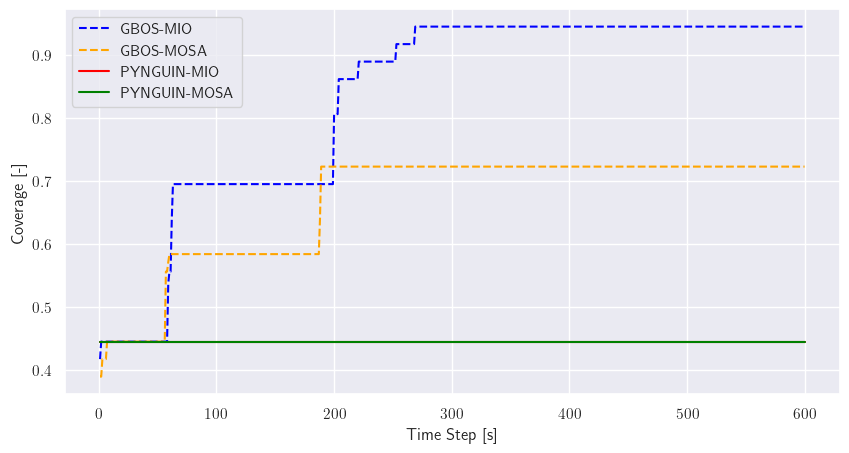

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

example_csv = pd.read_csv("CSV/results-thesisExample.csv")
example_csv.drop(["Coverage","GBOSFlags","GBOSDecisionTime","GBOSGenerationTime","SearchTime"], axis=1, inplace=True)
example_csv = example_csv.groupby('ConfigurationId').mean()

color = ['blue', 'orange', 'red', 'green']
style = ['dashed', 'dashed', 'solid', 'solid']

configIds = example_csv.index
sns.set_theme(style="darkgrid")

plt.figure(figsize=(10,5))

six_hund = [x for x in range(1, 601)]

for idx, conf in enumerate(configIds):
    time_serie = list(example_csv.loc[conf])
    sns.lineplot(x=six_hund,y=time_serie, color=color[idx], linestyle=style[idx], label=conf)
plt.ylabel("Coverage [-]")
plt.xlabel("Time Step [s]")
plt.legend()

plt.savefig(('Figures/exampleCov.jpg'))
plt.savefig(('../Document/Figures/Results/exampleCov.jpg'))